In [1]:
import evaluation 
import importlib
importlib.reload(evaluation)

<module 'evaluation' from '/Users/thomas/Documents/Master-Thesis/new_version/evaluation.py'>

In [2]:
from shallow_models.shallow_ensembles import RegressionEnsemble as ShallowEnsemble
import shallow_models
importlib.reload(shallow_models)

<module 'shallow_models' from '/Users/thomas/Documents/Master-Thesis/new_version/shallow_models/__init__.py'>

In [3]:
import ensembles
import networks
import dataset_creation
import tensorflow as tf
import base
#from shallow_models.shallow_ensembles import BootstrapEnsemble as ShallowBootstrap

In [4]:
trials = 3

num_neurons = [[10,10,10],[5,10,5],[10,5,10]]
seeds = [50,100,150,200]
num_layers = len(num_neurons[0])
learning_rates =[0.1, 0.01,0.001]# np.arange(0.1,0.001,0.01)#
activations = [[tf.nn.tanh]*num_layers,[tf.nn.leaky_relu]*num_layers, [tf.sigmoid]*num_layers]
initialisation_schemes = [tf.keras.initializers.he_normal, tf.contrib.layers.xavier_initializer] 
param_grid = {'num_neurons': num_neurons,
              'activations':activations,
             'initialisation_scheme':initialisation_schemes,
             'learning_rate':learning_rates,
             'seed':seeds,
             'l2':[True,False]
             }


model_params = {
    'seed':65,
    'learning_rate':0.2,
    'num_neurons':[100,50,30]
}

In [5]:
tg = evaluation.ThompsonGridSearch(param_grid=param_grid, 
                                   dataset_creator=dataset_creation.LinearDataset, 
                                   #thompson_model=ensembles.BootstrapEnsemble,
                                   thompson_model=networks.DropoutNetwork,
                                   test_model=base.EnsembleNetwork,
                                  model_params=model_params)

initialising Network <class 'networks.DropoutNetwork'>


In [6]:
#tg.plot_sample_grid()

In [7]:
tg.observed

[]

initialising Network <class 'base.EnsembleNetwork'>
432
432
432


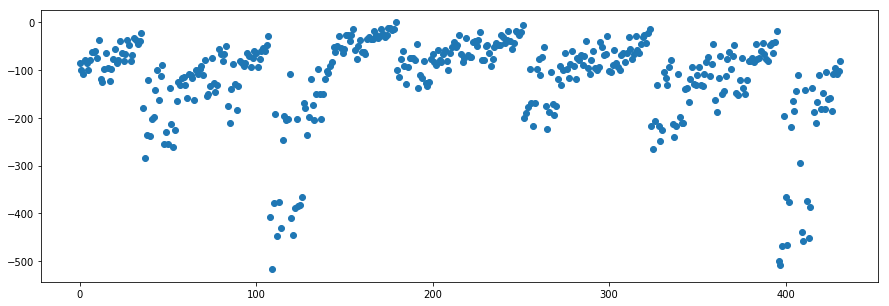

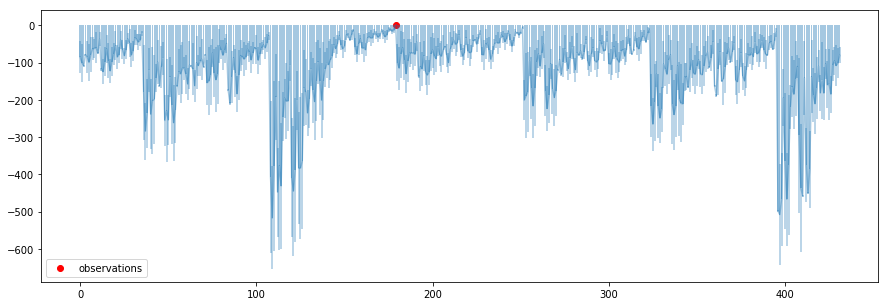

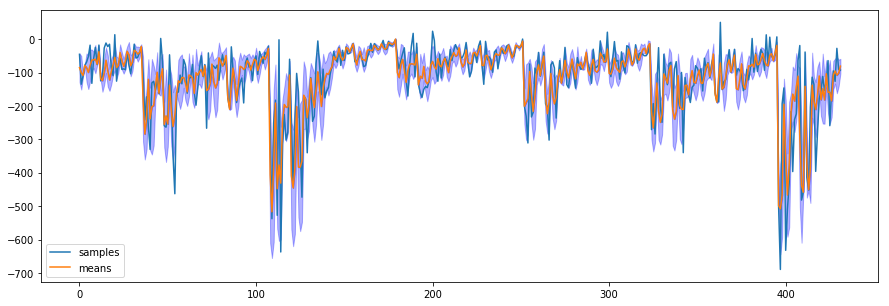

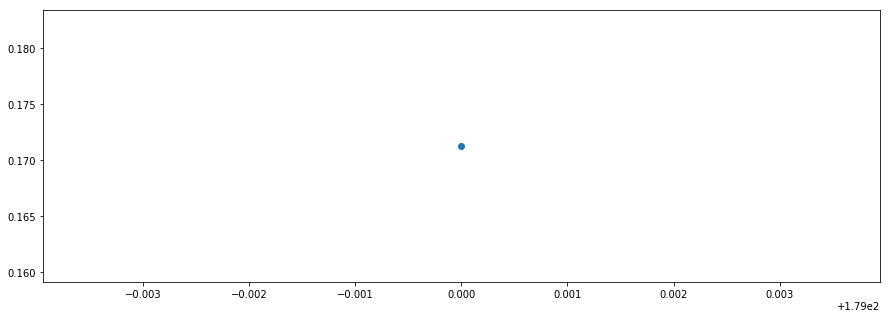

In [8]:
tg.goforit(1)
tg.plot_sample_grid()

In [9]:
import numpy as np

In [10]:
a = [np.array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0]])]

In [11]:
array = a[0]

In [12]:
[a.index(ar) for ar in a]

[0]

initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
432
432
432


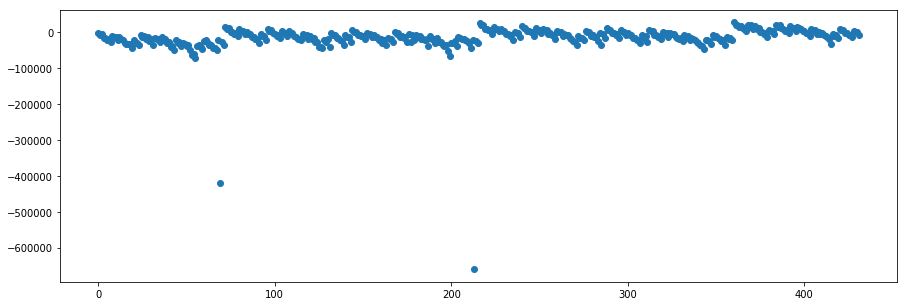

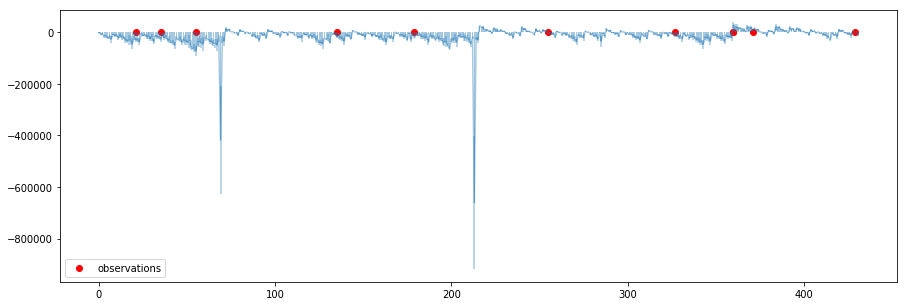

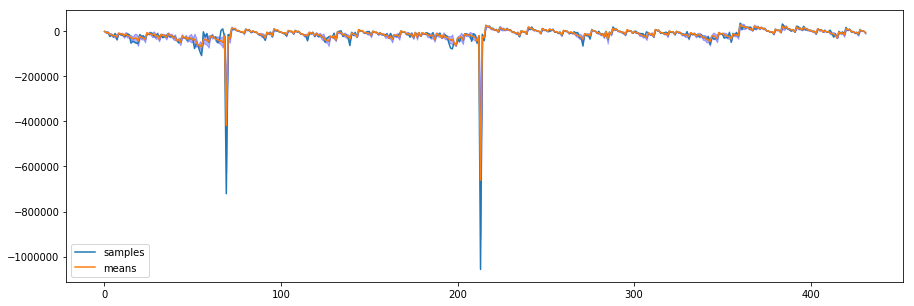

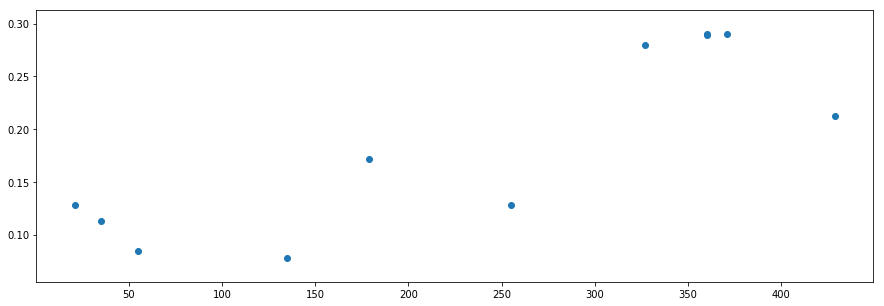

In [13]:
tg.goforit(10)
tg.plot_sample_grid()

In [ ]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>


In [ ]:
tg.goforit(10)
tg.plot_sample_grid()

In [ ]:
tg.goforit(10)
tg.plot_sample_grid()

In [ ]:
tg.goforit(10)
tg.plot_sample_grid()

In [ ]:
tg.goforit(10)
tg.plot_sample_grid()

In [ ]:
tg.goforit(10)
tg.plot_sample_grid()

In [ ]:
tg.goforit(10)
tg.plot_sample_grid()

In [ ]:
tg.goforit(10)
tg.plot_sample_grid()

In [ ]:
tg.goforit(10)
tg.plot_sample_grid()

In [ ]:
tg.goforit(10)
tg.plot_sample_grid()